**<h1 font-size:100px>ECONOMIC WELL-BEING PREDICTION CHALLENGE<h1>**

---



<h4> Solution by  XVIII_6 @zindi<h4>

<h2>PROBLEM STATEMENT <h2>
<h4>Granular information on economic well-being is extremely useful for governments, policy makers, and NGOs. But household surveys that capture this kind of information are expensive and conducted infrequently in many African countries. For this competition we will attempt to create a workaround for this lack of data by building a model able to predict a measure of wealth as measured in household surveys using readily available inputs.<h4>


<h2>OBJECTIVE OF THE CHALLENGE<h2>
<h4>Using data from 18 different countries collected at different times, you must correctly predict the cluster-level estimated wealth measures found from surveys in 7 different countries not covered in the training data. A successful model could be useful for filling in the gaps between the more expensive surveys.<h4>


<h2>EVALUATION<h2>
<h4>The evaluation metric for this competition is Root Mean Squared Error<h4>

<h4>RESEARCH QUESTIONS<h4>

* What is  the  type of the Machine learning does this problem is?

 - Regression,Supervised Learning.

* What are the factors for the economic well being 
   - asset ownership
   - Fraction for the land used for crops cultivation 
   - Distance to the country capital 
   - Place of living , either it is urban or rural ?
   - Education among the people in Africa country ?

   

* Does population density preview the economic well being of a country ? 



In [76]:
#mount the drive to read the data from folder in drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>IMPORTING THE IMPORTANT PACKAGES <h2>

In [77]:
#import the important library 
import pandas as pd  #used for reading csv files and visualizing  the data 
import numpy as np   #used for mathematics 
import matplotlib.pyplot as plt  #used for visualizing the data 
import seaborn as sns  #used for exploring and visualizing the data 
from sklearn.metrics import mean_squared_error#for evaluation the performance of the model 
from sklearn.model_selection import RepeatedStratifiedKFold #used for cross valiation to split the data into  stratas 
from sklearn.preprocessing import RobustScaler #used to normalize the data ,removes the median and scales the data according to the quantile range 
from category_encoders import CountEncoder #used for replacing categories with their counts
from catboost import CatBoostRegressor #Boosting Ensamble algorithm used 
from lightgbm import LGBMRegressor #Boosting Ensamble algorithm used
from sklearn.linear_model import Ridge #analyzing multiple regression data that suffer from multicollinearity 
import scipy.stats as stats #used for probabilistic distributions and statistical operations
import warnings 
warnings.simplefilter("ignore") #filter warning 

<h2>READING THE DATA <h2>

In [78]:
#Reading the data from csv files 
pd.set_option("display.max_columns",7000) #set the maximum columns  for cell 
pd.set_option("display.max_rows",None)#set the maximum rows  for cell 
pd.set_option("display.width",9000) #set the width for cell 
train=pd.read_csv("/content/drive/MyDrive/ECONOMIC/Train.csv") #read the train data
test=pd.read_csv("/content/drive/MyDrive/ECONOMIC/Test.csv") #read the test data 
SampleSubmission=pd.read_csv("/content/drive/MyDrive/ECONOMIC/SampleSubmission.csv") #read the sample submission file 


<h2>EXPLORE THE DATA<h2>

In [79]:
#Explore train data  for the first 20 rows 
train.head(20)

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.000000,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.000000,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.000000,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.000000,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328
5,ID_AAnetgMr,Ethiopia,2016,U,0.000000,0.008623,0.019409,0.059886,0.082682,0.829400,203.580507,24.629433,31.235708,0.000000,0.008223,22.981970,9.803702,487.790852,0.463882
6,ID_ABOoaqlI,Cameroon,2004,R,0.000000,0.000131,0.000149,0.000168,0.000093,0.999458,0.342950,0.011798,0.251395,0.000000,0.000289,0.000000,290.621111,477.563353,0.133302
7,ID_ABRVEEtG,Ghana,2014,R,0.000000,0.001298,0.001042,0.000219,0.000347,0.997094,14.340860,42.594576,4.180947,0.011511,0.112440,0.000000,438.103890,435.816271,0.545138
8,ID_ABbCEbbL,Senegal,2010,U,0.000000,0.000000,0.000751,0.001485,0.000035,0.997729,19.468199,11.332716,2.191206,0.410365,4.746894,0.528963,482.262914,320.867328,0.590187
9,ID_ABcnWkmC,Ethiopia,2016,R,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.105011,0.147196,0.000000,0.230172,0.000000,533.139137,1016.580304,0.122272


In [80]:
#Explore the train data for the last 10 rows 
train.tail(10)

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
21444,ID_zyoBSDvF,Tanzania,2008,U,0.0,0.000000,0.000790,0.000349,0.000643,0.998219,10.488112,33.168805,5.850590,2.139980,0.215556,0.000000,257.499432,456.432193,0.340661
21445,ID_zytjzoBK,Cote d'Ivoire,2011,U,0.0,0.232091,0.000000,0.036942,0.021323,0.709643,262.430831,6.455677,25.206611,1.047201,0.805027,34.589127,207.731928,16.804768,0.584942
21446,ID_zyyHDTQb,Kenya,2014,U,0.0,0.000075,0.000244,0.000319,0.000188,0.999174,20.141022,49.090095,0.483274,0.000578,0.005977,0.000000,140.722881,277.361740,0.273127
21447,ID_zyzHAKIL,Malawi,2015,R,0.0,0.005628,0.002740,0.009602,0.036790,0.945240,14.398296,33.062333,6.302211,0.000000,0.000000,0.000000,65.359441,502.474487,0.241307
21448,ID_zzJKKqnw,Nigeria,2013,U,0.0,0.012932,0.043155,0.052499,0.215050,0.676364,89.520966,15.355394,21.533464,0.963910,0.962027,18.633171,474.793510,12.090552,0.649643
21449,ID_zzPvDPjQ,Nigeria,2013,R,0.0,0.002961,0.008240,0.002313,0.008068,0.978418,44.044352,12.551978,6.302902,0.000000,0.000000,1.955632,283.861037,159.790057,0.624088
21450,ID_zzQoPhjZ,Senegal,2011,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.848571,0.372267,0.000000,0.000000,0.000000,295.307249,122.976960,0.250042
21451,ID_zzQuWZBF,Ghana,2014,R,0.0,0.000536,0.000092,0.000018,0.000074,0.999279,0.458143,3.679934,1.712136,0.000000,0.000000,0.442422,166.405249,155.365355,0.314871
21452,ID_zzqCGLvb,Ghana,2014,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.331763,0.960163,0.001899,0.061126,0.000000,568.759665,534.638628,0.237831
21453,ID_zzqQlHgY,Mozambique,2011,R,0.0,0.000035,0.000000,0.002073,0.000337,0.997556,15.223655,15.192034,1.565308,0.000000,0.000000,0.000000,1486.151015,216.519408,0.165071


In [81]:
#Explore the test data for the first 20 rows 
test.head(20)

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501
5,ID_ABomWihE,Angola,2015,R,0.000000,0.000045,0.000014,0.000000,0.000215,0.999726,0.788493,26.551023,0.456568,0.097405,0.054351,0.000000,592.234658,375.909873
6,ID_ACDBDjVC,Angola,2015,R,0.000000,0.001034,0.000646,0.000111,0.000314,0.997894,1.832477,0.193932,0.172020,0.000287,0.008607,0.000000,272.533821,234.375961
7,ID_AEnEBaEk,Democratic Republic of Congo,2013,U,0.000000,0.033927,0.005192,0.010214,0.029707,0.920961,85.236380,0.472719,11.152888,0.267555,0.329051,2.221194,1274.405522,1397.831543
8,ID_AFDiXCWE,Democratic Republic of Congo,2007,R,0.000000,0.000038,0.000019,0.000210,0.001107,0.998626,11.304915,27.687337,0.248089,0.000000,0.000000,0.000000,1787.629167,1194.865813
9,ID_AFFdlZrY,Zimbabwe,2005,R,0.000000,0.000000,0.000017,0.000017,0.000202,0.999764,0.216617,22.079975,0.101850,0.005203,0.006666,0.000000,111.963960,365.193962


In [82]:
#Explore the test data for the last 10 rows 
test.tail(10)

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
7184,ID_zwExrPVK,Uganda,2009,R,0.154908,0.000000,0.000000,0.000038,0.000950,0.844105,16.529088,26.557577,1.530552,8.199331,9.620503,0.000000,137.958113,859.357364
7185,ID_zwKNBJNO,Angola,2016,R,0.000000,0.000000,0.000000,0.000000,0.000444,0.999556,0.941343,9.191574,0.008879,0.000000,0.000000,0.000000,799.510832,581.880069
7186,ID_zwTGWDHp,Zimbabwe,2010,U,0.008700,0.019165,0.115002,0.043201,0.037691,0.776240,169.238602,26.164398,24.110814,0.471521,0.486572,10.994876,22.928201,406.460211
7187,ID_zwfgsalj,Democratic Republic of Congo,2007,R,0.000000,0.000652,0.000000,0.000447,0.001266,0.997634,3.058265,0.477964,0.232974,0.000000,0.008037,0.000000,310.094141,57.429500
7188,ID_zwxxRjgI,Zambia,2007,R,0.000000,0.000000,0.000000,0.000018,0.000068,0.999913,0.281298,2.602726,1.352739,1.370448,14.129320,0.000000,444.100354,1071.821519
7189,ID_zxzKJCMI,Zimbabwe,2010,R,0.000000,0.000000,0.000000,0.000016,0.000131,0.999853,0.304446,32.263180,0.658724,0.000000,0.077742,0.103892,500.988790,703.139988
7190,ID_zyBrpgRp,Uganda,2011,U,0.000000,0.000056,0.000883,0.003861,0.002483,0.992717,36.160182,27.520555,3.615442,0.000000,0.001157,0.000000,159.587852,1000.194893
7191,ID_zyMafcYq,Burkina Faso,2010,U,0.002683,0.000268,0.002800,0.009322,0.042527,0.942399,46.127465,35.674511,12.705561,0.001129,0.723252,4.734974,33.775441,781.833777
7192,ID_zyfMsHMG,Zimbabwe,2011,R,0.000332,0.000000,0.000017,0.000000,0.000100,0.999551,0.309696,18.050789,0.030514,0.033177,0.222629,0.175123,320.974153,605.920204
7193,ID_zytUOqJv,Democratic Republic of Congo,2007,U,0.076950,0.128367,0.000000,0.041799,0.139710,0.613173,162.182887,3.917284,36.528453,4.499446,0.647506,4.224699,1186.131373,1456.101058


In [83]:
#Explore the sample submission file
SampleSubmission.head()

,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [84]:
train.shape,test.shape,SampleSubmission.shape#checking the shape of the train,test,and sample submission file.  

((21454, 19), (7194, 18), (7194, 2))

In [85]:
train.info()#Explore the information of the train data ,like the data type of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [86]:
test.info()#Explore the information of the test data ,like the data type of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       7194 non-null   object 
 1   country                                  7194 non-null   object 
 2   year                                     7194 non-null   int64  
 3   urban_or_rural                           7194 non-null   object 
 4   ghsl_water_surface                       7194 non-null   float64
 5   ghsl_built_pre_1975                      7194 non-null   float64
 6   ghsl_built_1975_to_1990                  7194 non-null   float64
 7   ghsl_built_1990_to_2000                  7194 non-null   float64
 8   ghsl_built_2000_to_2014                  7194 non-null   float64
 9   ghsl_not_built_up                        7194 non-null   float64
 10  ghsl_pop_density                         7194 no

In [87]:
train.isnull().sum()#Checking the sum of the null values in each columns in train data 

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [88]:
test.isnull().sum()#checking the sum of the null values in each columns of the test data 

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

In [89]:
train['urban_or_rural'].value_counts()#check and count the  unique values in column urban_or_rural for the train data 

R    14061
U     7393
Name: urban_or_rural, dtype: int64

In [90]:
test['urban_or_rural'].value_counts()#check and count the  unique values in column urban_or_rural for the test data 

R    4613
U    2581
Name: urban_or_rural, dtype: int64

In [91]:
train.describe().T #describe the train data to check for statistics for numerical column in train data 

,count,mean,std,min,25%,50%,75%,max
year,21454.0,2010.060874,4.799579,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,21454.0,0.028259,0.097490,0.000000,0.000000,0.000000,0.000000,0.969956
ghsl_built_pre_1975,21454.0,0.038222,0.113562,0.000000,0.000000,0.000198,0.007987,0.877116
ghsl_built_1975_to_1990,21454.0,0.028644,0.077367,0.000000,0.000000,0.000709,0.009868,0.685010
ghsl_built_1990_to_2000,21454.0,0.012689,0.032745,0.000000,0.000043,0.001001,0.008128,0.515534
ghsl_built_2000_to_2014,21454.0,0.018386,0.040421,0.000000,0.000124,0.001871,0.014936,0.649159
ghsl_not_built_up,21454.0,0.873800,0.239294,0.000859,0.897867,0.991919,0.999532,1.000000
ghsl_pop_density,21454.0,95.756775,209.704761,0.000000,3.848533,17.632672,63.225683,1741.256516
landcover_crops_fraction,21454.0,21.034265,16.751106,0.000000,5.610515,18.509291,33.590293,80.064918
landcover_urban_fraction,21454.0,13.999061,23.715485,0.000000,0.798841,2.770159,12.621501,98.784092


In [92]:
test.describe().T#describe the train data to check for statistics for numerical column in test data 

,count,mean,std,min,25%,50%,75%,max
year,7194.0,2010.899778,3.651409,1998.000000,2010.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,7194.0,0.023317,0.087915,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,7194.0,0.049325,0.132582,0.000000,0.000000,0.000089,0.008020,0.894608
ghsl_built_1975_to_1990,7194.0,0.025364,0.057233,0.000000,0.000000,0.000320,0.010774,0.506349
ghsl_built_1990_to_2000,7194.0,0.016767,0.038079,0.000000,0.000019,0.000720,0.012036,0.275297
ghsl_built_2000_to_2014,7194.0,0.018319,0.039703,0.000000,0.000075,0.001359,0.015915,0.359931
ghsl_not_built_up,7194.0,0.866908,0.252557,0.008900,0.889836,0.994922,0.999738,1.000000
ghsl_pop_density,7194.0,93.147365,211.196451,0.000000,1.071279,12.290615,66.695301,1902.876955
landcover_crops_fraction,7194.0,21.285033,14.916804,0.000000,7.855023,21.105082,31.998608,74.401875
landcover_urban_fraction,7194.0,14.318006,24.510227,0.000000,0.459067,2.087011,14.174194,97.210607


<h2>EXPLORE DATA ANALYSIS AND VISUALIZATION<h2>

In [93]:
train.duplicated().sum().any()#checking if there is any sum of the dupicated values in train data 

False

In [94]:
test.duplicated().sum().any()#checking if there is any sum of the dupicated values in test  data 

False

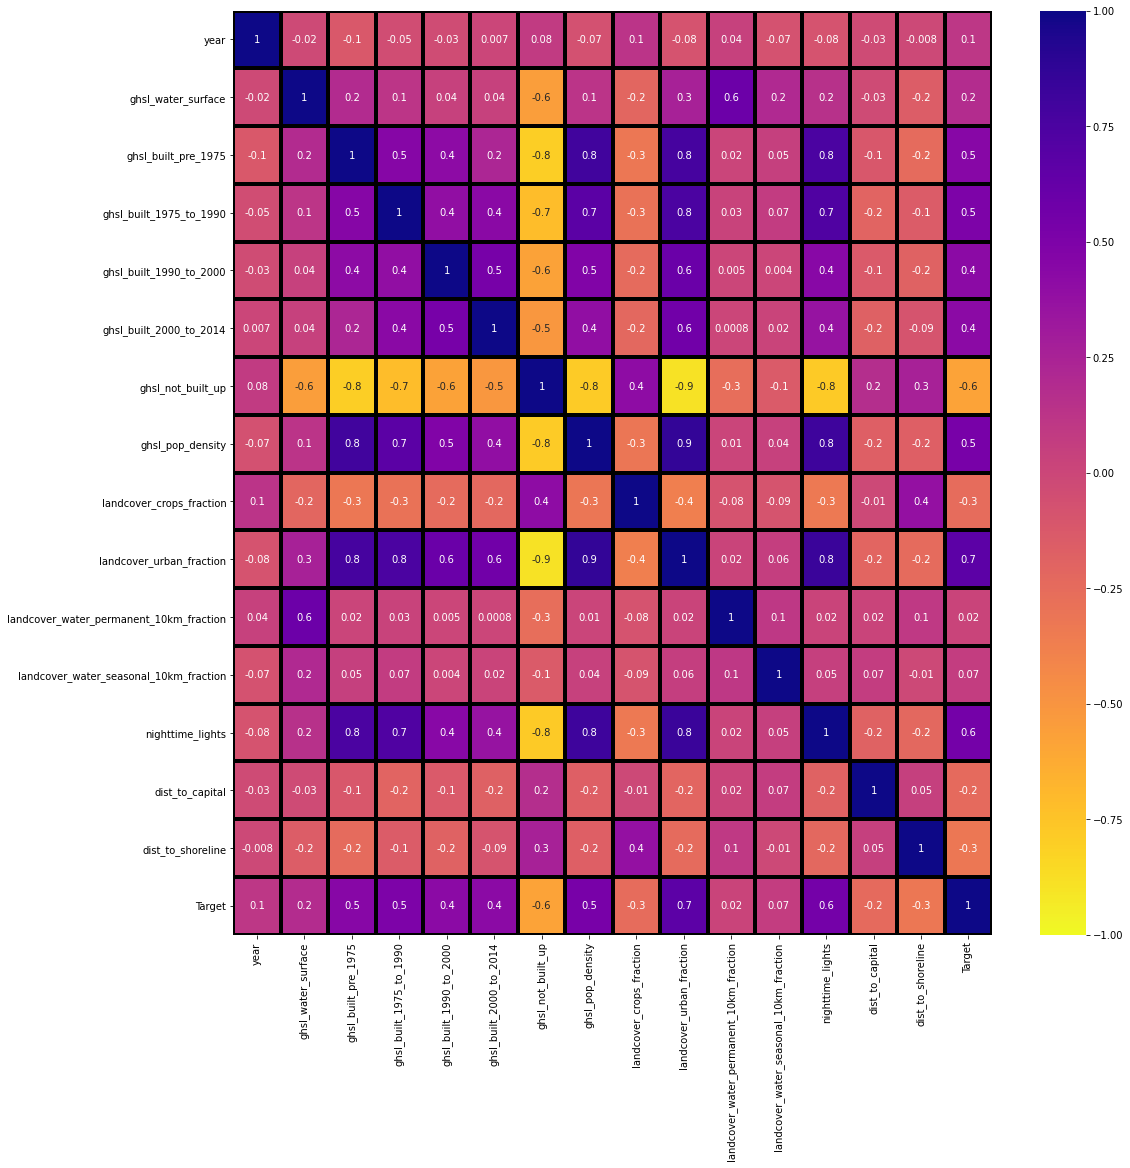

In [95]:
# using pearson correlation to check for the correlational features in the train data 
features=train.corr().index 
plt.figure(figsize=(17,17))
sns.heatmap(train[features].corr(),annot=True,cmap='plasma_r',fmt='.1g',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')

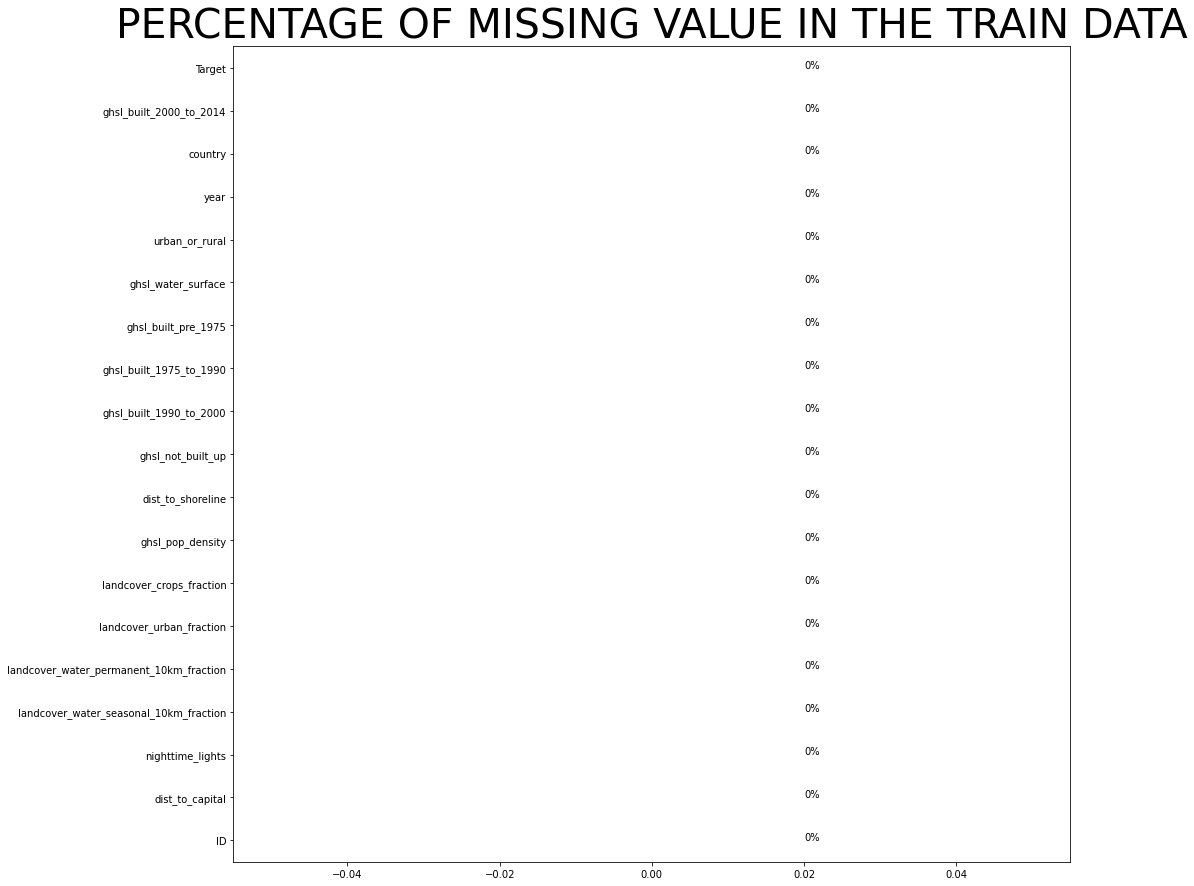

In [96]:
#Using graph to check the percentage of the missing values in the train data 
graph= train.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('PERCENTAGE OF MISSING VALUE IN THE TRAIN DATA', fontdict={'size':41})
for p in graph.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))

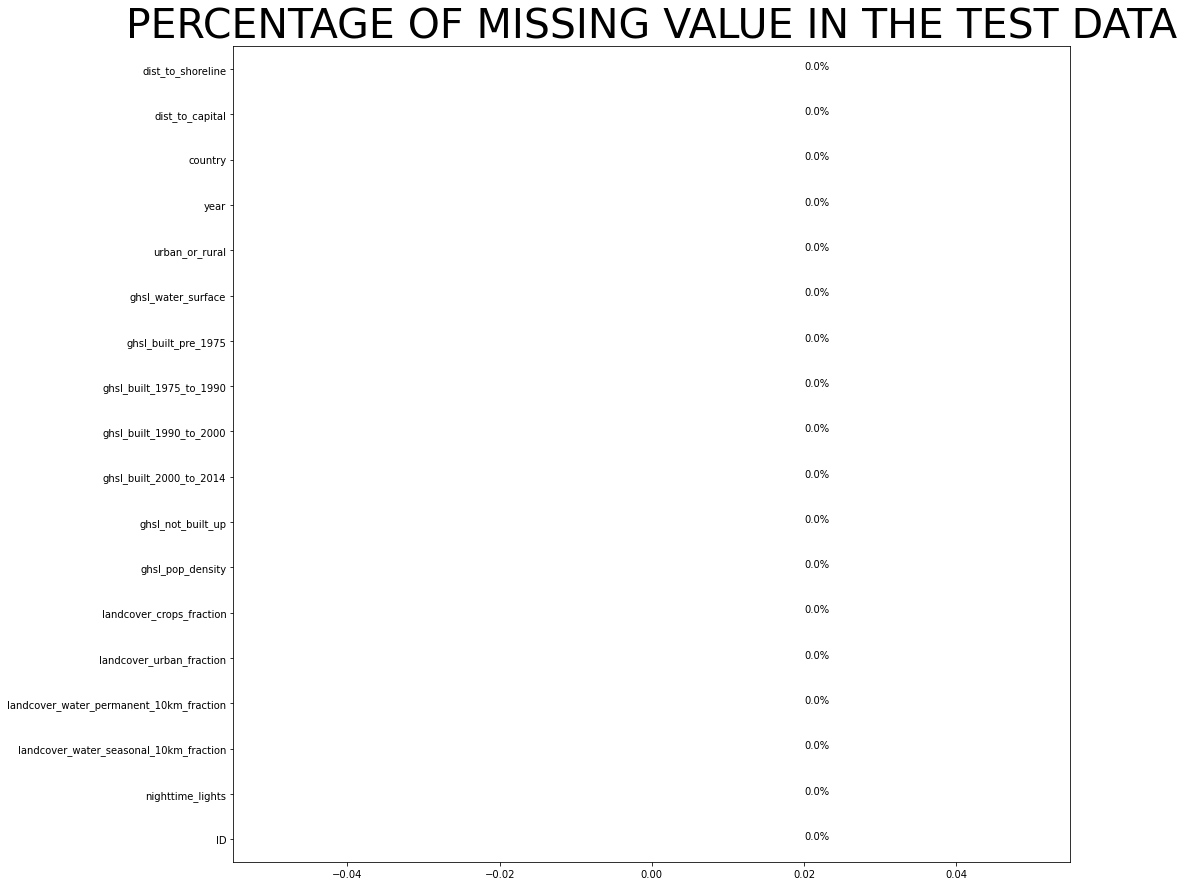

In [97]:
#Using graph to check the percentage of the missing values in the test data 
graph = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('PERCENTAGE OF MISSING VALUE IN THE TEST DATA', fontdict={'size':41})
for p in graph.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))

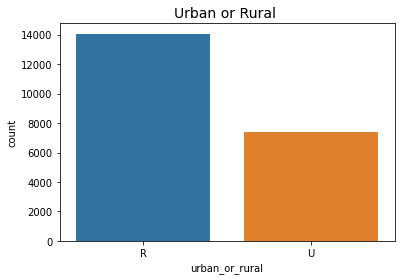

In [98]:
#Checking the counts for urban or rural column in the train data 
#That shows the dataset has many people from the rural area 
sns.countplot(train.urban_or_rural)
plt.title('Urban or Rural ', fontdict={'size':14});

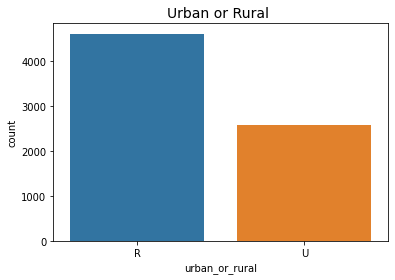

In [99]:
#Checking the counts for urban or rural column in the test data 
#That shows the dataset  has many people from the rural are 
sns.countplot(test.urban_or_rural);
plt.title('Urban or Rural ', fontdict={'size':14});

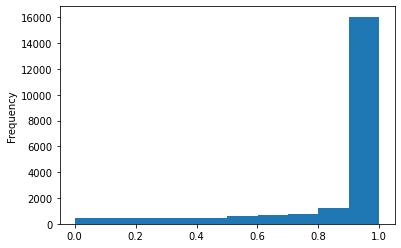

In [100]:
train['ghsl_not_built_up'].plot(kind='hist');#graphical visualizing of the ghsl_not_built_up in train ,as it appeared to has negative correlations 

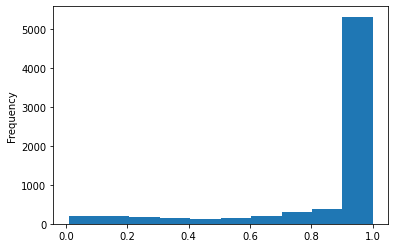

In [101]:
test['ghsl_not_built_up'].plot(kind='hist');#graphical visualizing of the ghsl_not_built_up in test ,as it appeared to has negative correlations 

In [102]:
# function to create histogram, Q-Q plot and
# boxplot. For visualizing the features
def creat_plots(data, variable):
    # function takes a dataset  and
    # the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')
    plt.show()

TRAIN


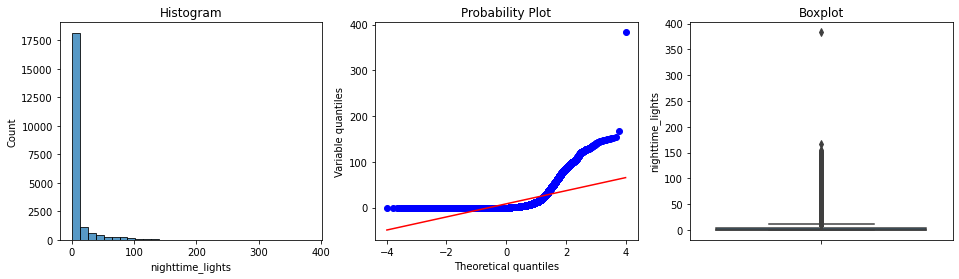

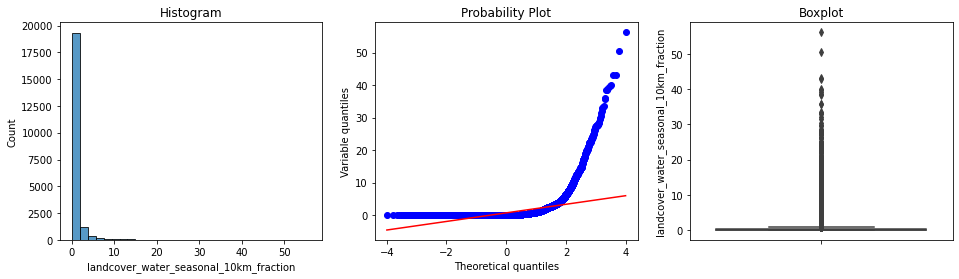

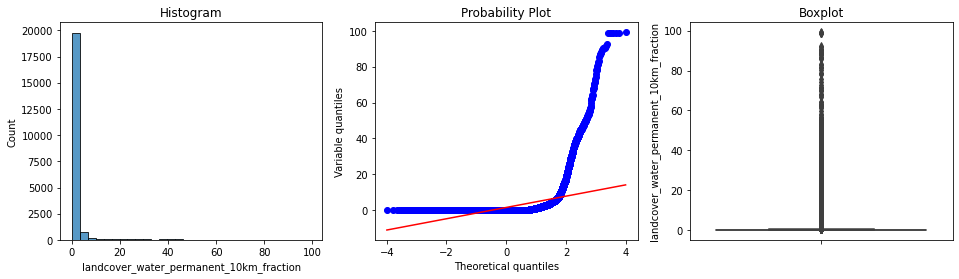

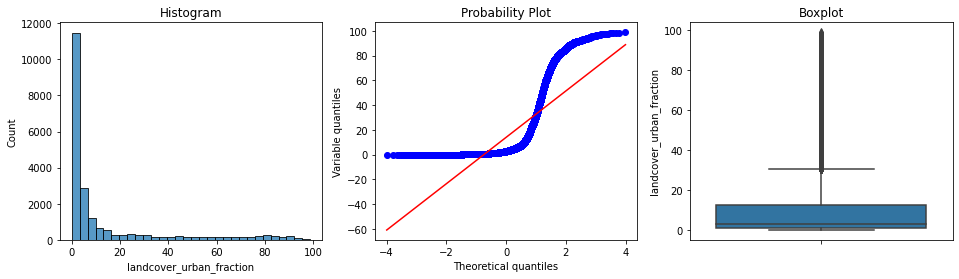

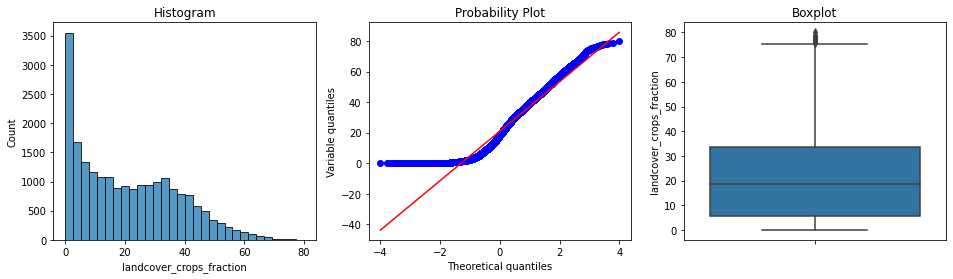

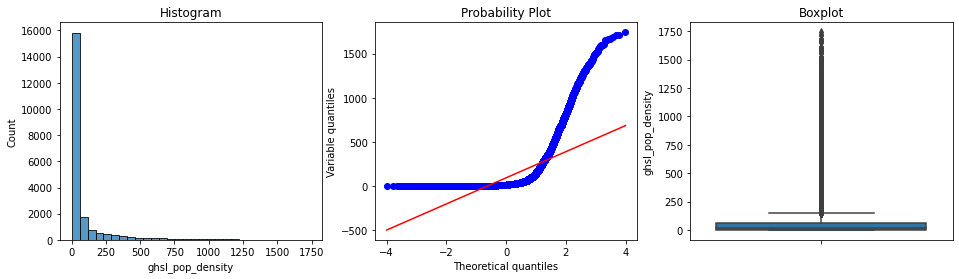

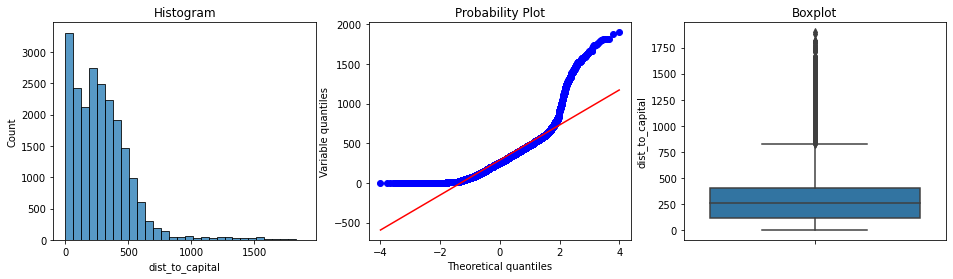

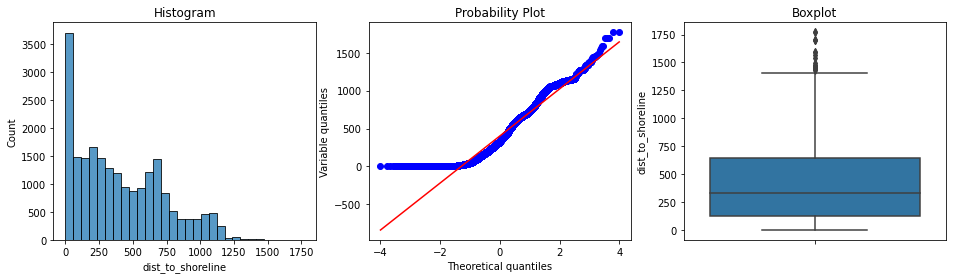

TEST


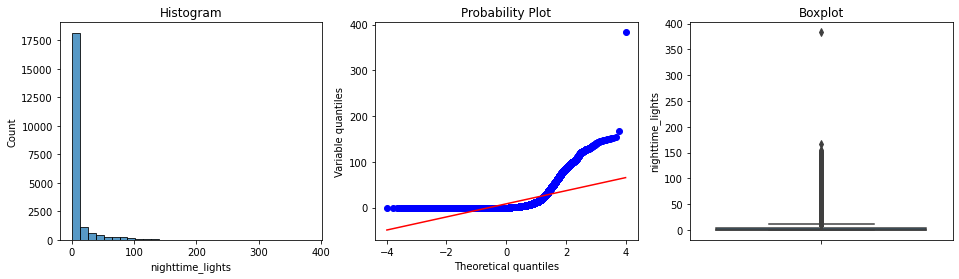

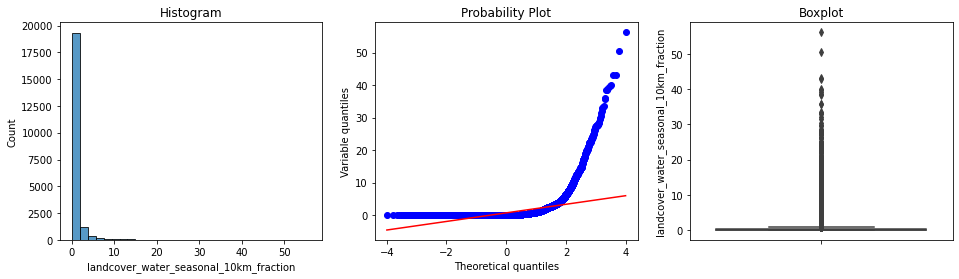

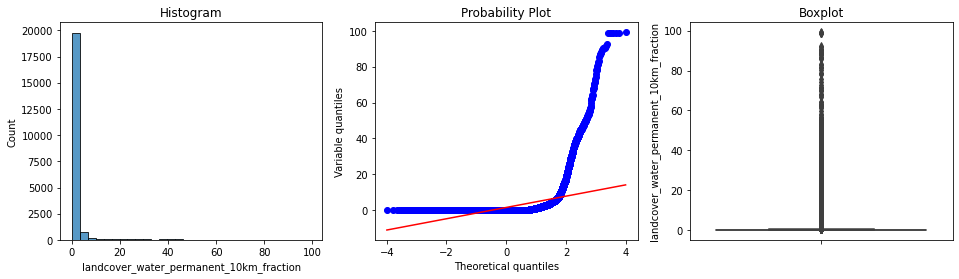

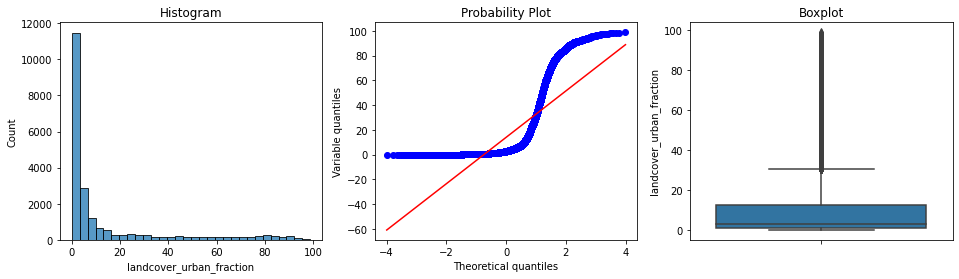

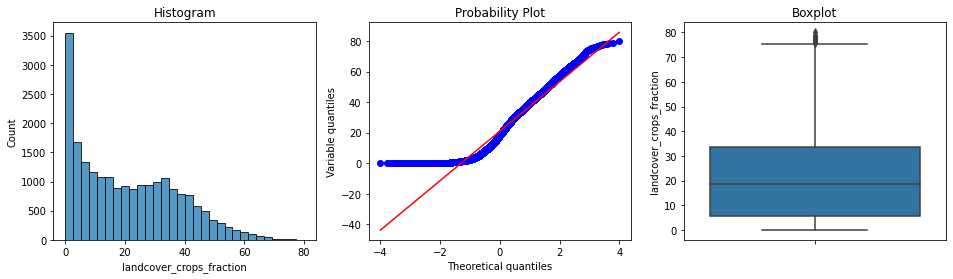

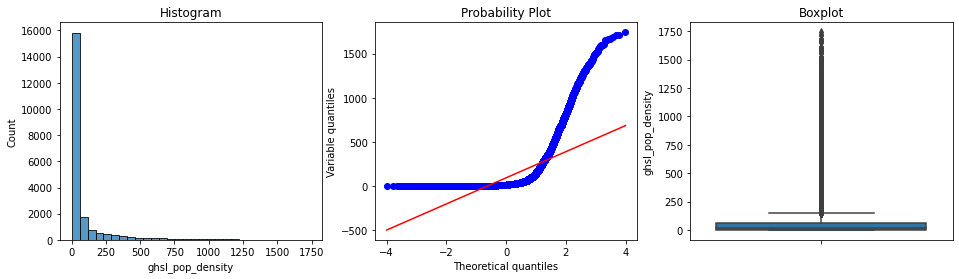

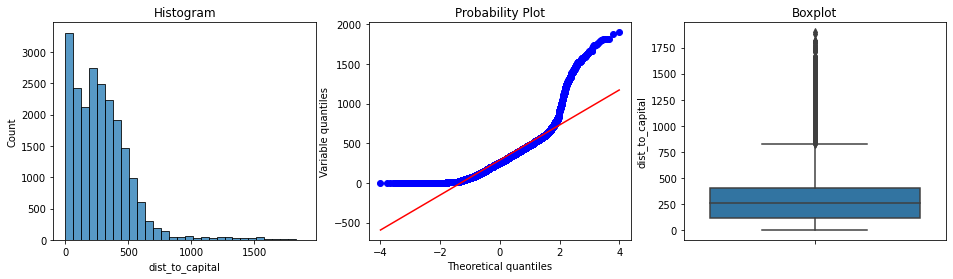

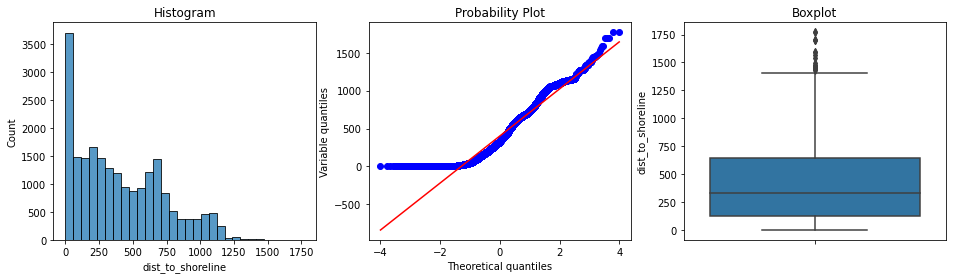

In [103]:
# let's find outliers in some columns in Train data 
plots=['nighttime_lights','landcover_water_seasonal_10km_fraction','landcover_water_permanent_10km_fraction','landcover_urban_fraction','landcover_crops_fraction','ghsl_pop_density','dist_to_capital','dist_to_shoreline']
print("TRAIN");#for train's columns visualization
for x in plots:
    creat_plots(train,x); 
print("TEST"); #for test's columns visualization 
for x in plots:
    creat_plots(train,x);

<h4>PPREPROCESSING DATA AND BUILDING THE MODEL<h4>

In [104]:
#Defining the function to cleaning,normalizing and preprocessing the data 
def process(train, test, normalizer=RobustScaler(), encoder=CountEncoder(normalize=True, )): 
    scale =["ghsl_pop_density", "nighttime_lights", "dist_to_shoreline", "dist_to_capital"]#list for features to be scled
    scale1=["landcover_crops_fraction","landcover_urban_fraction","landcover_water_permanent_10km_fraction","landcover_water_seasonal_10km_fraction"]#list for features to be scaled to 100 
    train[scale1]=train[scale1]/100
    test[scale1]=test[scale1]/100
    normalizer.fit(train[scale])#fiting the normalizer to the scaled features
    train[scale]=normalizer.transform(train[scale])#transform the train data by using normalizer
    test[scale]=normalizer.transform(test[scale])#transform the test data by using normalizer
    def target(label):# function to discretize the target 
     if label <=0.2:
        return 1
     elif label <=0.4:
        return 2
     elif label <=0.6:
        return 3
     elif label <=0.8:
        return 4
     else:
        return 5
    cat2=train["Target"].apply(target)#apply function target to the target column
    ntrain=train.shape[0]
    train_ids=train.ID.unique()
    test_ids=test.ID.unique() 
    train.year = train.year.astype(str)
    cat = train[["country", "urban_or_rural", "year"]].apply(lambda x: " x ".join(x.values), axis=1)
    groups = train["country"]
    all_data=pd.concat([train, test], axis=0)#concatenate the train data and  test data 
    cat_cols = ["country", "urban_or_rural", "year"]
    float_cols = train.columns.difference(cat_cols+["Target", "ID"])
    all_data.year=all_data.year.apply(str)
    all_data[cat_cols]=encoder.fit_transform(all_data[cat_cols])
    train = all_data.loc[all_data.ID.isin(train_ids)]#returning the train data
    test = all_data.loc[all_data.ID.isin(test_ids)]#returning the test data 
    main_cols=train.columns.difference(["ID", 'Target'])
    xtrain = train[main_cols]
    xtest = test[main_cols]
    ytrain=train.Target 
    return xtrain, ytrain, xtest, cat, cat2, groups
xtrain, ytrain, xtest, cat2, cat, groups = process(train, test)#Applying the process function 

In [105]:
#Defining the function for metrics 
def metric(x, y):
    return np.sqrt(mean_squared_error(x, y)) #return the root mean squared error 

In [106]:
cValidation= RepeatedStratifiedKFold(n_splits = 5,random_state=42, );#defining the cross validation by using the RepeatedStratifiedKfolds 

<h2>BUILDING MODELS<h2>

In [107]:
#function for the xgb model,
def xgb_predict(estimator,train,label, test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (tr_ind,te_ind) in enumerate(cValidation.split(train, cat, groups)):                                                     
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'Fold{count +1}')
        estimator.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric="rmse",eval_set=[(x_test, y_test)],verbose=2500)
        train_predict = estimator.predict(x_train, ntree_limit = estimator.get_booster().best_ntree_limit)
        test_predict = estimator.predict(x_test, ntree_limit = estimator.get_booster().best_ntree_limit)
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict(test, ntree_limit = estimator.get_booster().best_ntree_limit)
        print('Testing scores', metric(y_test,test_predict))
        print('Training scores', metric(y_train,train_predict))
        mean_train.append(metric(y_train, train_predict))
        mean_test_val.append(metric(y_test,test_predict))
    print('Average Testing score for 50 folds split:',np.mean(mean_test_val))
    print('Average Training  score for 50 folds split:',np.mean(mean_train))
    print('standard Deviation for 50 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name

In [108]:
#function for the cat boost model,
def cat_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(cValidation.split(train, cat, groups)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        x_train = np.nan_to_num(x_train)
        y_train = np.nan_to_num(y_train)
        x_test = np.nan_to_num(x_test)
        y_test = np.nan_to_num(y_test)
        print(f'Fold{count +1}')
        estimator.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=200,verbose=2500,use_best_model=True)
        train_predict = estimator.predict(x_train)
        test_predict = estimator.predict(x_test)
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict(test)
        print('Testing scores', metric(y_test,test_predict))
        print('Training scores', metric(y_train,train_predict))
        mean_train.append(metric(y_train, train_predict))
        mean_test_val.append(metric(y_test,test_predict))
    print('Average Testing  score for 50 folds split:',np.mean(mean_test_val))
    print('Average Training  score for 50 folds split:',np.mean(mean_train))
    print('standard Deviation for 50 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name

In [109]:
#function for the lgbm model,
def lgb_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(cValidation.split(train, cat, groups)):
        x_train,x_test = train.iloc[train_index].values,train.iloc[test_index].values
        y_train,y_test = label.iloc[train_index].values,label.iloc[test_index].values
        print(f'Fold{count +1}')
        estimator.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=200,verbose=2500)
        train_predict = estimator.predict(x_train, num_iteration = estimator.best_iteration_)
        test_predict = estimator.predict(x_test, num_iteration = estimator.best_iteration_)
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict(test, num_iteration = estimator.best_iteration_)
        print('Validation scores', metric(y_test,test_predict))
        print('Training scores', metric(y_train,train_predict))
        mean_train.append(metric(y_train, train_predict))
        mean_test_val.append(metric(y_test,test_predict))
    print('Average Testing  score for 50 folds split:',np.mean(mean_test_val))
    print('Average Training  score for 50 folds split:',np.mean(mean_train))
    print('standard Deviation for 50 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name

In [110]:
#Function for finding the rmse for 50 kfolds by the models after prediction by the models 
def model_predict(estimator,train,label,test, estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros((test.shape[0]))
    val_pred = np.zeros((train.shape[0]))
    for count, (train_index,test_index) in enumerate(cValidation.split(train, cat, groups)):
        x_train,x_test = train.iloc[train_index].values,train.iloc[test_index].values
        y_train,y_test = label.iloc[train_index].values,label.iloc[test_index].values
        print(f'Fold{count +1}')
        estimator.fit(x_train, y_train)
        train_predict = estimator.predict(x_train)
        test_predict = estimator.predict(x_test)
        val_pred[test_index] = test_predict.reshape((test_predict.shape[0],))
        test_pred+= estimator.predict(test.values)
        print('Validation scores', metric(y_test,test_predict))
        print('Training scores', metric(y_train,train_predict))
        mean_train.append(metric(y_train, train_predict))
        mean_test_val.append(metric(y_test,test_predict))
    print('Average Testing RMSE  for 50 folds split:',np.mean(mean_test_val))
    print('Average Training RMSE  for 50 folds split:',np.mean(mean_train))
    print('standard Deviation for 50 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name, np.mean(mean_test_val), np.mean(mean_train)

In [111]:
#function to create train and test stack 
def Create_StackDataFrames(train_preds, test_preds, names):
    Train_stack = pd.concat([pd.Series(tr_pred, name=name) for tr_pred, name in zip(train_preds, names)],1)
    Test_stack = pd.concat([pd.Series(te_pred, name=name) for te_pred, name in zip(test_preds, names)],1)
    Test_stack = Test_stack/50   #averaging the  predictions for 50 folds on the test dataset 
    return Train_stack, Test_stack

In [112]:
#function for stacking ,the train stack,test stack for multicollinearity and creat the submission file 
def Stack(meta_estimator,Train_stack,Test_stack,target,file_name):
    val_pred, test_pred, estimator_name, test_score, train_score = model_predict(meta_estimator,Train_stack, ytrain, Test_stack, "Ridge")
    prediction = test_pred/50
    SampleSubmission['Target'] = prediction
    SampleSubmission.Target=SampleSubmission.Target.apply(abs)#return the absolute value for a given number 
    SampleSubmission.to_csv(file_name,index=False)#create submission files having predictions
    return SampleSubmission, val_pred, test_pred, estimator_name, test_score, train_score

In [113]:
#function to train the models built 
def training_model(model_name, xtrain, ytrain, xtest):
    catboost =  CatBoostRegressor(random_seed=34,use_best_model=True,n_estimators=400000,silent=True,eval_metric='RMSE')
    cat1_train, cat1_test, cat1_name = cat_predict(catboost,xtrain, ytrain, xtest,  'catboost')
    lgb_model = LGBMRegressor(random_state=34, n_estimators=100000, colsample_bytree=0.9, min_child_samples=10, subsample=0.7,subsample_freq=2,num_leaves=120,reg_lambda=1,reg_alpha=1, metric="rmse", learning_rate=0.01,max_depth=5)
    LGB1__train, LGB1_test, LGB1_name =lgb_predict(lgb_model,xtrain, ytrain, xtest,'lightgbm')
    Train_stack1, Test_stack1 = Create_StackDataFrames([cat1_train, LGB1__train], [cat1_test, LGB1_test], [cat1_name, LGB1_name])
    meta_estimator = Ridge()
    SampleSubmission, val_pred, test_pred, estimator_name, test_score, train_score = Stack(meta_estimator, Train_stack1, Test_stack1, ytrain, f'stack_{model_name}.csv') 
    return SampleSubmission, val_pred, test_pred, estimator_name, test_score, train_score
SampleSubmission, val_pred, test_pred, estimator_name, test_score, train_score = training_model("always", xtrain, ytrain, xtest)

Fold1
Learning rate set to 0.001887
0:	learn: 0.1940332	test: 0.1945537	best: 0.1945537 (0)	total: 6.97ms	remaining: 46m 27s


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

2500:	learn: 0.0933961	test: 0.0932361	best: 0.0932361 (2500)	total: 17.1s	remaining: 45m 14s
5000:	learn: 0.0880604	test: 0.0888667	best: 0.0888667 (5000)	total: 33.8s	remaining: 44m 25s
7500:	learn: 0.0848888	test: 0.0871683	best: 0.0871683 (7500)	total: 50.4s	remaining: 43m 56s
10000:	learn: 0.0825898	test: 0.0863977	best: 0.0863975 (9997)	total: 1m 6s	remaining: 43m 24s
12500:	learn: 0.0807111	test: 0.0859013	best: 0.0859013 (12500)	total: 1m 23s	remaining: 43m 2s
15000:	learn: 0.0790851	test: 0.0855845	best: 0.0855843 (14999)	total: 1m 39s	remaining: 42m 43s
17500:	learn: 0.0776438	test: 0.0853529	best: 0.0853529 (17500)	total: 1m 56s	remaining: 42m 20s
20000:	learn: 0.0763715	test: 0.0851748	best: 0.0851746 (19987)	total: 2m 12s	remaining: 41m 58s
22500:	learn: 0.0751884	test: 0.0850327	best: 0.0850326 (22498)	total: 2m 28s	remaining: 41m 38s
25000:	learn: 0.0740940	test: 0.0849147	best: 0.0849146 (24992)	total: 2m 45s	remaining: 41m 20s
27500:	learn: 0.0730500	test: 0.0847955	be